Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# Shape of the numpy arrays
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Train set = 60000 images

Test set = 10000 images

Size of images = 28 * 28

In [ ]:
print(X_train[10].shape)

(28, 28)


3


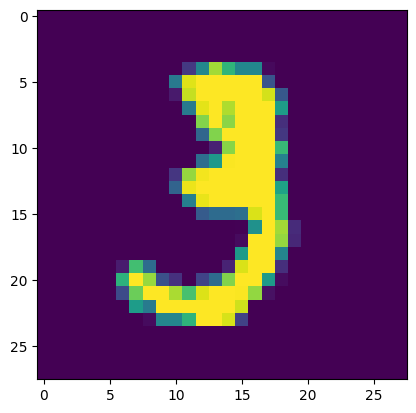

In [ ]:
# Display the image

plt.imshow(X_train[10])
plt.show

# Print the corresponding label

print(y_train[10])

In [ ]:
# Print unique values of y_train and y_test

print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can alsy apply OneHotEncoding

We reshape the value of colors to be in range (0, 1) and not between (0, 255)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Create the Neural Network

In [ ]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(28, 28)),
                        keras.layers.Dense(60, activation='relu'),
                        keras.layers.Dense(30, activation='relu'),
                        keras.layers.Dense(10, activation='sigmoid')
])

Compile the model

In [ ]:
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Train the model with train labels

In [ ]:
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3124 - accuracy: 0.9101
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1454 - accuracy: 0.9568
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1069 - accuracy: 0.9678
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0855 - accuracy: 0.9735
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0688 - accuracy: 0.9789
Epoch 6/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0581 - accuracy: 0.9815
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0502 - accuracy: 0.9835
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9860


Now we check the Accuracy on the Test data

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0936 - accuracy: 0.9744
0.974399983882904


In [ ]:
print(X_test.shape)

(10000, 28, 28)


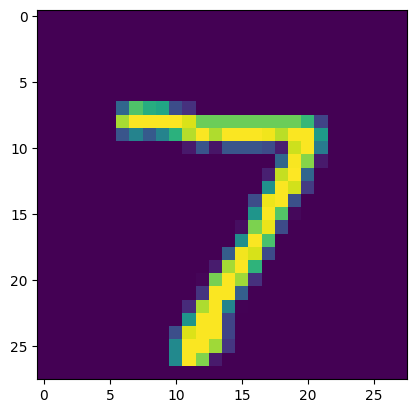

In [ ]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[5.7808138e-02 1.5095383e-04 3.6308441e-01 7.4731243e-01 7.7243894e-06
 6.4846031e-02 3.0387525e-06 9.9999851e-01 1.8259288e-01 2.3033405e-02]


In [ ]:
# Convert the prediction probabilities to a class label

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test = True labels

y_pred_labels = Predicted labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(confusion_matrix)

<function confusion_matrix at 0x7f817097f5e0>


Text(0.5, 80.7222222222222, 'Predicted labels')

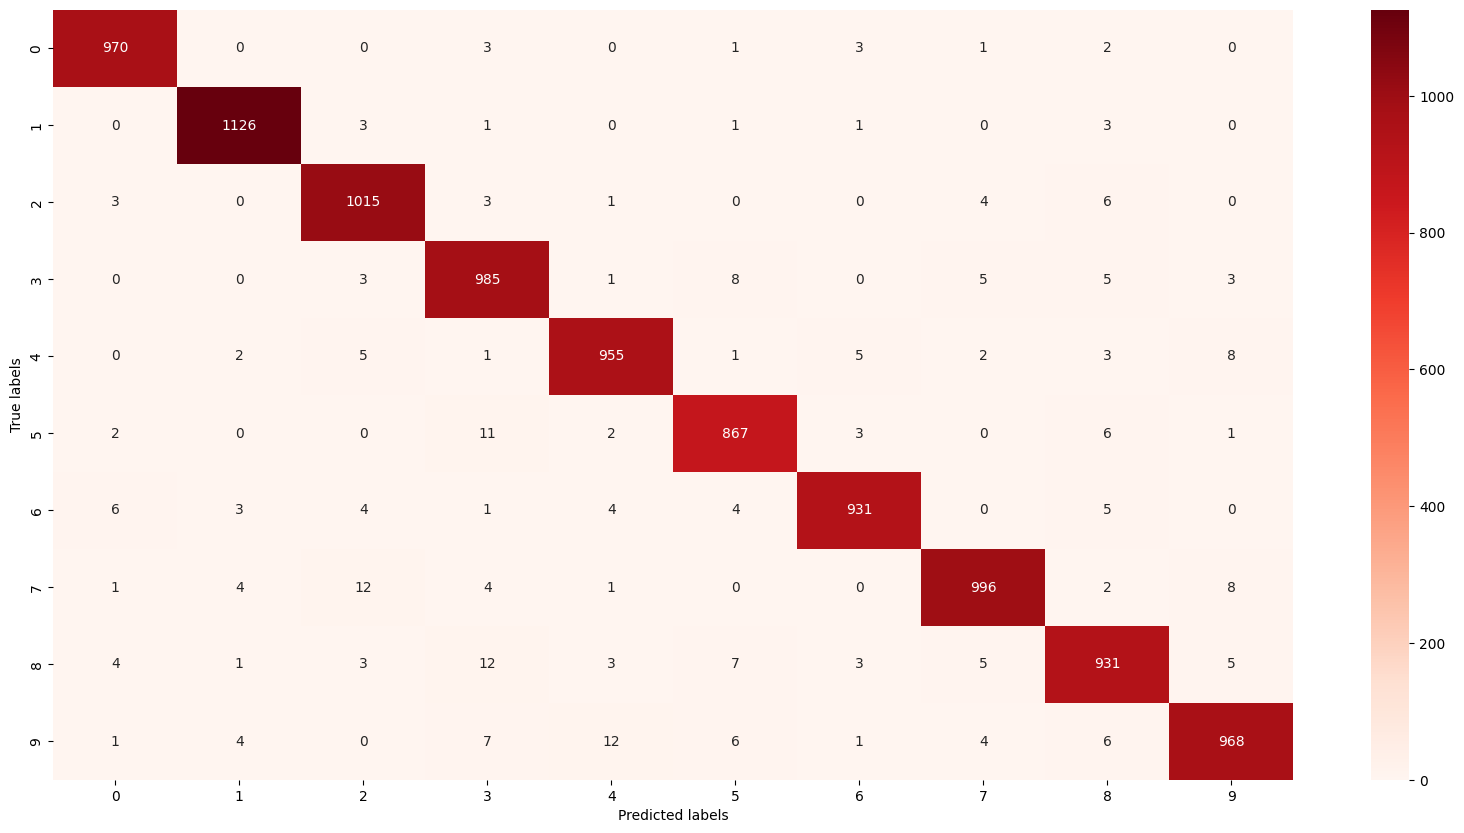

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Now we build a Predictive System

In [ ]:
input_image_path = "/content/MNIST_digit.png" # Here is the path for the image we want to predict

input_image = cv2.imread(input_image_path)

We need to reshape the pixels in the input_image and change the colors to rgb

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
input_image_resize  = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [ ]:
input_prediction = model.predict(image_reshaped)

1/1 [==============================] - 0s 26ms/step


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3
